In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import RK45, odeint
from scipy.special import expit

In [37]:
i = 0.0+1.0j; k1 = 1.3*10**12; k2 = 1.3*10**12; k3 = 2.6*10**12; w1 = 10**12; w2 = 3*10**12; w3 = w1 + w2
delta_k1 = 0; d = 10; c = 3*10**8; A2 = 2+0.0j

K1 = 2*i*w1**2*d/(k1*c**2)*np.conj(A2)
K3 = 2*i*w3**2*d/(k3*c**2)*A2

delta_k2 = 4*(-K1*K3)**0.5 # 4*kappa


def dA1dz(z,S):
    #Constants above. I made them simple, but will probably need to know reasonable values at one point.
    dA1, A1 = S
    return (K1*K3*A1, dA1)

def dA3dz(z,S): #delta_k != 0
    #Constants above. I made them simple, but will probably need to know reasonable values at one point.
    dA3, A3 = S
    return (K1*K3*A3, dA3)

y0 = [0+0.0j,100+0.0j]
y02 = [0.5*K3*y0[1],+0.0j]
sol1 = RK45(dA1dz,0.0,y0,10000,10,10,vectorized = True)
sol2 = RK45(dA3dz,0.0,y02,10000,10,10,vectorized = True)

z = [];
dA1_int = []
A1_int = []

z2 = [];
dA1_int2 = []
A3_int = []

for i in range(1001):
    sol1.step()
    dA1_int.append(np.abs(sol1.y[0])**2)
    A1_int.append(np.abs(sol1.y[1])**2)
    z.append(sol1.t) 
    if sol1.status == "finished":
        break
        
for i in range(1001):
    sol2.step()
    dA1_int2.append(np.abs(sol2.y[0])**2)
    A3_int.append(np.abs(sol2.y[1])**2)
    z2.append(sol2.t) 
    if sol2.status == "finished":
        break


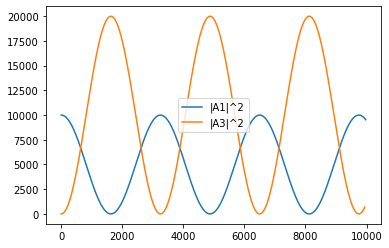

In [36]:
plt.plot(z,A1_int)
plt.plot(z2,A3_int)
plt.legend(["|A1|^2", "|A3|^2"])
plt.show()